In [1]:
import cv2 as cv
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from google_images_download import google_images_download 

In [4]:
image = face_recognition.load_image_file("obama.jpeg")
img_encoding = face_recognition.face_encodings(image)[0]
face_locations = face_recognition.face_locations(image, model="cnn")

known_face_encodings = [
    img_encoding
]
known_face_names = [
    "Barack Obama"
]

In [5]:
response = google_images_download.googleimagesdownload() 

def downloadimages(query, num_images=4):
    
    arguments = {"keywords": query,
                 "format": "jpg",
                 "limit":num_images,
                 "print_urls":True,
                 "size": "medium",
                 "aspect_ratio":"panoramic"}
    try:
        response.download(arguments)
      
    # Handling File NotFound Error    
    except FileNotFoundError: 
        arguments = {"keywords": query,
                     "format": "jpg",
                     "limit":4,
                     "print_urls":True, 
                     "size": "medium"}
                       
        # Providing arguments for the searched query
        try:
            # Downloading the photos based
            # on the given arguments
            response.download(arguments) 
        except:
            pass

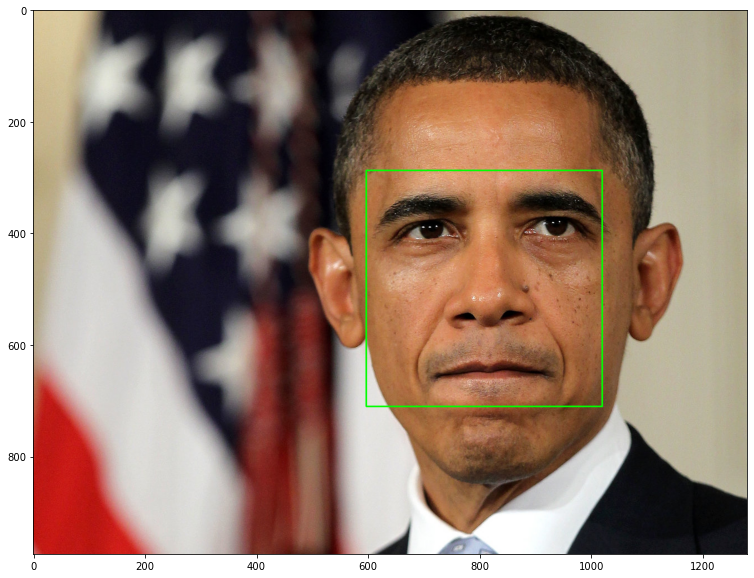

In [6]:
plt.figure(figsize=(18, 10))

text_height, text_width, _ = image.shape
top, right, bottom, left = face_locations[0]
cv.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
plt.imshow(image)

In [7]:
class FaceFinder():
    def __init__(self, known_names, known_encodings):
        self.known_encodings = known_encodings
        self.known_names = known_names
        self.img = None
        self.face_locations = None
        self.face_encodings = None
        self.text_height = None
        self.text_width = None
        
    def load_image(self, img_path):
        self.img = face_recognition.load_image_file(img_path)

        # Find all the faces and face encodings in the unknown image
        self.face_locations = face_recognition.face_locations(self.img)
        self.face_encodings = face_recognition.face_encodings(self.img, self.face_locations)
        self.text_height, self.text_width, _ = self.img.shape
    
    def detect(self):
        for (top, right, bottom, left), face_encoding in zip(self.face_locations, self.face_encodings):
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(self.known_encodings, face_encoding)

            name = "Unknown"

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(self.known_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = self.known_names[best_match_index]

            cv.rectangle(self.img, (left, top), (right, bottom), (0, 255, 0), 2)
            cv.putText(self.img, name, (left + 6, top + 30), cv.FONT_HERSHEY_TRIPLEX, 1, (255, 255, 255), 2)

        return self.img, name

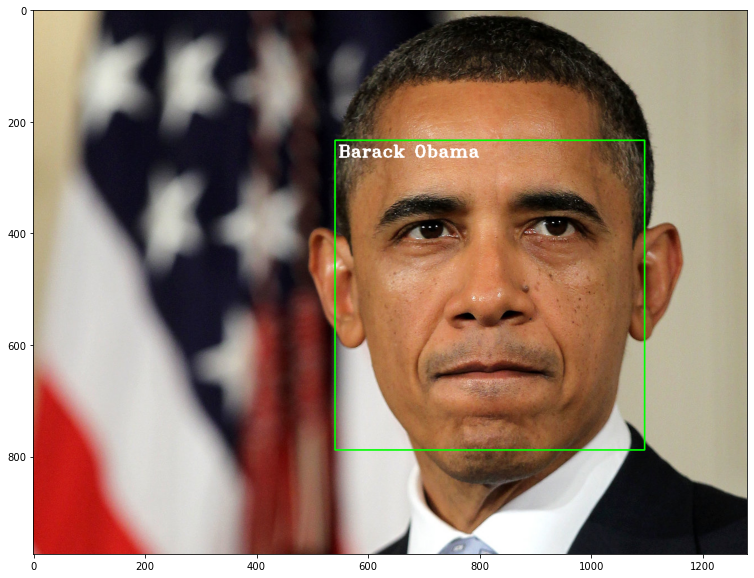

In [8]:
finder = FaceFinder(known_face_names, known_face_encodings)
finder.load_image("obama.jpeg")
plot, name = finder.detect()

plt.figure(figsize=(18, 10))
plt.imshow(plot)

In [20]:
import os
path = "downloads/Obama Frontal Face/"
finder = FaceFinder(known_face_names, known_face_encodings)
FILE_TYPES = ('png', 'jpg', 'jpeg', 'tiff', 'bmp')

for file in os.listdir(path):
    if file.split(".")[-1] in FILE_TYPES:
        full_path = os.path.join(path, file)
        finder.load_image(full_path)
        plot, name = finder.detect()
        print(name)


Barack Obama
Barack Obama
Barack Obama
Barack Obama
